In [1]:
# Librerias requeridas
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Clásicas de ciencia de datos 
import pandas as pd 
import numpy as np 
from datetime import datetime

# Escalado de datos 
from sklearn.preprocessing import StandardScaler

# Visualización 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Algoritmos para los modelos 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

# Visualizar todo el dataframe de izquierda a derecha
from IPython.display import display, Markdown
pd.set_option('display.max_columns', None)

# Métricas de desempeño
from sklearn.metrics import r2_score

# Actualizar el archivo de funciones
import importlib 
import A_Funciones as funciones # Este archivo contiene las funciones a utilizar
importlib.reload(funciones) # Actualiza los cambios en el archivo de las funciones

<module 'A_Funciones' from 'c:\\Users\\jorge\\Desktop\\Proyectos aplicación en analítica\\Proyecto Salud\\A_Funciones.py'>

In [2]:
# Importamos los datos preprocesados
df_final = joblib.load('Salidas\\df_final.pkl')
pd.options.display.max_columns = None

**Obtener dummies**

In [3]:
df_final = pd.get_dummies(df_final)
df_final = df_final.astype(int)
df_final

,Saturación de oxigeno,PerÃ­metro Muslo,PerÃ­metro Cintura,Sumatoria Pliegues,Presion arterial sistolica,Presion arterial diastolica,Frecuencia Cardia­aca en reposo,Auto-calificacion Nivel de Ejercicio,Indice metabolico,Maxima capacidad de oxigeno,Ãndice de Fragilidad Groningen,Glicemia,Hemoglobina Glicada,Lipoproteina,HDL,Colesterol total,Trigliceridos,Creatinina 1 consulta,TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Creatinina 2 consulta,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,EDAD_2,SERVICIO HABILITADO COD,Horas_estancia,IMC_Bajo,IMC_Normal,IMC_Obesidad Grasa,IMC_Sobrepeso,Calificacion velocidad_Aceptable,Calificacion velocidad_Bueno,Calificacion velocidad_Deficiente,Calificacion velocidad_Malo - FrÃ¡gil,Tiene HTA_No,Tiene HTA_Si,Tiene EPOC_EPOC no espirometrico,Tiene EPOC_No,Tiene EPOC_Si,Tiene EPOC_Sospecha,Insuficiencia cardiaca_Controlada,Insuficiencia cardiaca_Deterioro de c. funcional,Insuficiencia cardiaca_No,Insuficiencia cardiaca_No aplica,Insuficiencia cardiaca_No controlada,Insuficiencia cardiaca_Signos de sobrecarga,Arritmia o paciente con dispositivo_No,Arritmia o paciente con dispositivo_Si,Sufre de alguna enfermedad cardiovascular_No,Sufre de alguna enfermedad cardiovascular_Si,Tabaquismo_Ex-fumador,Tabaquismo_No,Tabaquismo_Si,Estadio de la Enfermedad Renal_Estadio 0,Estadio de la Enfermedad Renal_Estadio 1,Estadio de la Enfermedad Renal_Estadio 2,Estadio de la Enfermedad Renal_Estadio 3A,Estadio de la Enfermedad Renal_Estadio 3B,Estadio de la Enfermedad Renal_Estadio 4,Estadio de la Enfermedad Renal_Estadio 5,Clase Funcional_Clase Funcional 1,Clase Funcional_Clase Funcional 2A,Clase Funcional_Clase Funcional 2B,Clase Funcional_Clase Funcional 3,RemisiÃ³n_Grupal 1,RemisiÃ³n_Grupal 2,RemisiÃ³n_Grupal 3,RemisiÃ³n_Grupal 4,Diagnostico_Diabetes,Diagnostico_Hipertensión,SEXO_F,SEXO_M,MUNICIPIO_BELLO,MUNICIPIO_ENVIGADO,MUNICIPIO_ITAGUI,MUNICIPIO_LA ESTRELLA,MUNICIPIO_MEDELLIN,MUNICIPIO_SABANETA,MUNICIPIO_SAN ANTONIO DE PRADO,MUNICIPIO_SAN CRISTOBAL,MUNICIPIO_VEREDA LA MARIA,MUNICIPIO_VEREDA YARUMALITO,PRIMERA CLASE FUNCIONAL_Clase Funcional 1,PRIMERA CLASE FUNCIONAL_Clase Funcional 2A,PRIMERA CLASE FUNCIONAL_Clase Funcional 2B,PRIMERA CLASE FUNCIONAL_Clase Funcional 3,PRIMERA CLASE FUNCIONAL_Clase Funcional 4,PRIMERA CLASE FUNCIONAL_Sin clasificar,ÚLTIMA CLASE FUNCIONAL_Clase Funcional 2A,ÚLTIMA CLASE FUNCIONAL_Clase Funcional 2B,ÚLTIMA CLASE FUNCIONAL_Clase Funcional 3,ÚLTIMA CLASE FUNCIONAL_Clase Funcional 4,ÚLTIMA CLASE FUNCIONAL_Sin clasificar,SERVICIO HABILITADO_Cuidado Intensivo Adultos,SERVICIO HABILITADO_Cuidado Intermedio Adultos,SERVICIO HABILITADO_General adultos,SERVICIO HABILITADO_Urgencias >= 24 horas,SERVICIO ADMITE_Ambulatoria Personal,SERVICIO ADMITE_Ambulatoria Programada,SERVICIO ADMITE_Cirugía,SERVICIO ADMITE_Hospitalización,SERVICIO ADMITE_Urgencias Generales Piso 1,SERVICIO ADMITE_Urgencias Generales Sótano,SERVICIO ADMITE_Urgencias Maternas,VIA INGRESO_Consulta Externa ó Programada,VIA INGRESO_Remitido,VIA INGRESO_Urgencias,BLOQUE_Bloque 1,BLOQUE_Bloque 3,UNIDAD ESTRATEGICA_Apoyo Terapeutico,UNIDAD ESTRATEGICA_CUIDADOS ESPECIALES,UNIDAD ESTRATEGICA_Hospitalizacion Adultos,UNIDAD ESTRATEGICA_UCI Adultos,UNIDAD ESTRATEGICA_Urgencias,PISO_Piso 1,PISO_Piso 10,PISO_Piso 2,PISO_Piso 3,PISO_Piso 4,PISO_Piso 5,PISO_Piso 6,PISO_Piso 7,PISO_Piso 8,PISO_Piso 9,PISO_Urgencias,SERVICIO EGRESO_Camillas SAI Adultos,SERVICIO EGRESO_Camillas Sala 1 Urgencias,SERVICIO EGRESO_Camillas Sala 2 Urgencias,SERVICIO EGRESO_Camillas Sala 3 Urgencias,SERVICIO EGRESO_Camillas Sala 4 Urgencias,SERVICIO EGRESO_Camillas Sala 5 Urgencias,SERVICIO EGRESO_Camillas Sala 6 Urgencias,SERVICIO EGRESO_Camillas Sala 7 Urgencias,SERVICIO EGRESO_Camillas Sala 8 - Blanca,SERVICIO EGRESO_Camillas Sala 8 Urgencias,SERVICIO EGRESO_Camillas Sala Remitidos,SERVICIO EGRESO_ERA,SERVICIO EGRESO_ERA 1,SERVICIO EGRESO_ERA 2,SERVICIO EGRESO_Expansión,SERVICIO EGRESO_Fast track 1,SERVICIO

In [4]:
# Separamos nuestra variable objetivo de las demás 
y0 = df_final.Horas_estancia
X1 = df_final.loc[:,~df_final.columns.isin(['Horas_estancia'])]

# Escalamos variable dependiente
scaler = StandardScaler()
y = pd.DataFrame(y0)
scaler.fit(y)
y = scaler.transform(y)

# Escalamos variables independientes
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)
X = pd.DataFrame(X2, columns = X1.columns)

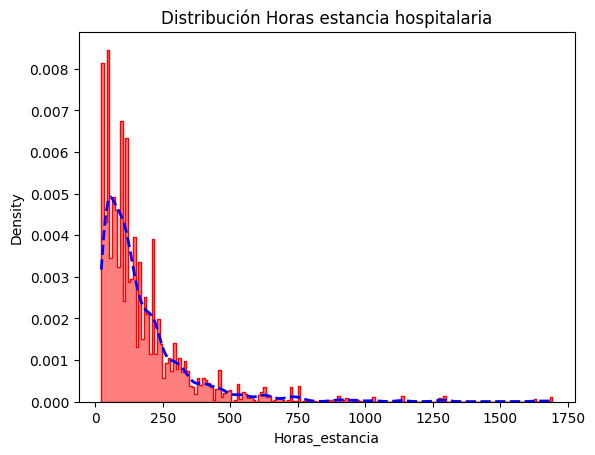

In [5]:
# Distribución de la variable objetivo
sns.histplot(x = y0, element = "step",  stat = "density", color = "red", 
             alpha = 0.5, kde = True, 
             line_kws = {'linestyle':'dashed', 'linewidth':'2'}).lines[0].set_color('blue')
plt.title('Distribución Horas estancia hospitalaria')
plt.show()

El comportamiento de la distribución de la variable objetivo, al no comportarse de manera normal, no se debería implementar con un modelo de regresión lineal

**Modelos propuestos**

Evaluación de modelos Random forest, Decision Tree Regressor y XGBoosst 

In [6]:
# Random forest - Decision Tree Regressor - XGBoosst 
m_rf = RandomForestRegressor() 
m_dt = DecisionTreeRegressor()
m_xg = XGBRFRegressor()

modelos = [m_rf, m_dt,  m_xg]

Selección de variables

In [7]:
var_names = funciones.sel_variables(modelos, X, y, '1.25*mean')
X_sel = X[var_names]

c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Se mide el desempeño de los modelos para el conjunto de variables seleccionadas y para el conjunto de datos completo 


In [8]:
# Desempeño para el conjunto de datos completo
m_all = funciones.medir_modelos(modelos, 'r2', X, y, 5)

# Desempeño con las variables seleccionadas
m_var_sel = funciones.medir_modelos(modelos, 'r2', X_sel, y, 5)

c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

Evaluación de modelos, K-Nearest-Neighbor y Support vector machines

In [9]:
# K-Nearest-Neighbor - Support vector machines
m_knn = KNeighborsRegressor()
m_svm = svm.SVR()

In [11]:
# Desempeño con todo el conjunto de datos
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

m_all0 = pd.DataFrame()
modelos = [m_knn, m_svm]

for modelo in modelos:
    scores = cross_val_score(modelo, X, y, scoring = 'r2', cv = 5 )
    pdscores = pd.DataFrame(scores)
    m_all0 = pd.concat([m_all0,pdscores], axis = 1)

m_all0.columns = ['K-Nearest-Neighbor', "Support Vector Machines"]

c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

In [12]:
m_var_sel0 = pd.DataFrame()
modelos = [m_knn, m_svm]

for modelo in modelos:
    scores = cross_val_score(modelo, X_sel, y, scoring = 'r2', cv = 5 )
    pdscores = pd.DataFrame(scores)
    m_var_sel0 = pd.concat([m_var_sel0, pdscores], axis = 1)

m_var_sel0.columns = ['K-Nearest-Neighbor', "Support Vector Machines"]

c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

**RESUMEN DEL DESEMPEÑO DE LOS MODELOS**

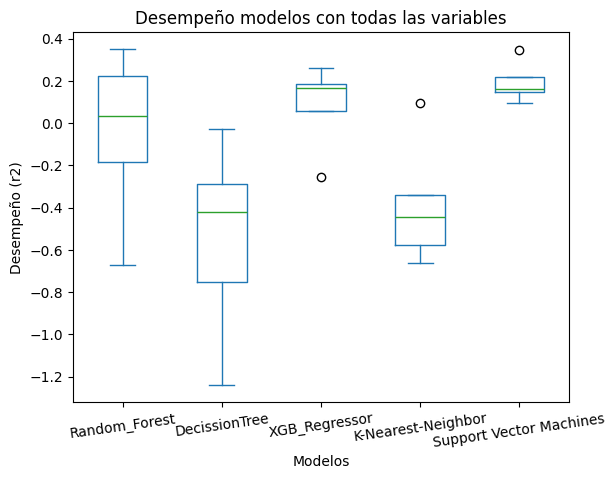

In [13]:
# Desempeño modelos con todas las variables
resultados_var_all = pd.concat([m_all, m_all0], axis = 1)
resultados_var_all.plot(kind = 'box')
plt.title("Desempeño modelos con todas las variables")
plt.xlabel('Modelos')
plt.ylabel('Desempeño (r2)')
plt.tick_params(axis='x', rotation = 8)
plt.show()

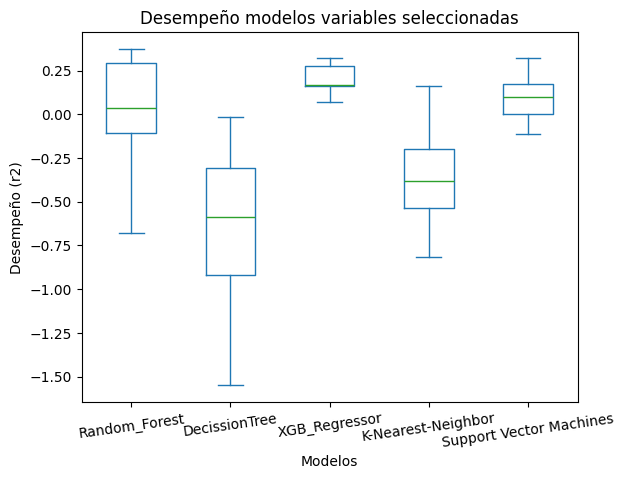

In [14]:
# Desempeño modelos con las variables seleccionadas 
resultados_var_sel = pd.concat([m_var_sel, m_var_sel0], axis = 1)
resultados_var_sel.plot(kind = 'box')
plt.title("Desempeño modelos variables seleccionadas")
plt.xlabel('Modelos')
plt.ylabel('Desempeño (r2)')
plt.tick_params(axis='x', rotation = 8)
plt.show()